# Taller 1
Por:
* Camilo Esteban Zambrano 
* Brian Camilo Saiz

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

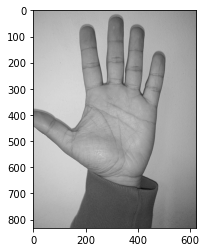

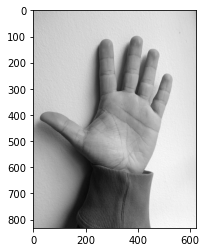

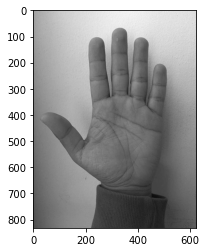

In [4]:
interior = cv2.imread("fig/interior.jpg", 0)
soleado = cv2.imread("fig/soleado.jpg", 0)
sombra = cv2.imread("fig/sombra.jpg", 0)

plt.imshow(interior, cmap="gray")
plt.figure()
plt.imshow(soleado, cmap="gray")
plt.figure()
plt.imshow(sombra, cmap="gray")

In [54]:
def histogramas(bins):
    hist_interior = cv2.calcHist([interior],[0],None,[bins],[0,256])
    hist_soleado = cv2.calcHist([soleado],[0],None,[bins],[0,256])
    hist_sombra = cv2.calcHist([sombra],[0],None,[bins],[0,256])
    
    cv2.normalize(hist_interior ,hist_interior , 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(hist_soleado ,hist_soleado , 0, 255, cv2.NORM_MINMAX)
    cv2.normalize(hist_sombra ,hist_sombra , 0, 255, cv2.NORM_MINMAX)
    
    correlation12 = cv2.compareHist(hist_interior, hist_soleado, 0)
    correlation13 = cv2.compareHist(hist_interior, hist_sombra, 0)
    correlation23 = cv2.compareHist(hist_soleado, hist_sombra, 0)
    
    chisqrt12 = cv2.compareHist(hist_interior, hist_soleado, 1)
    chisqrt13 = cv2.compareHist(hist_interior, hist_sombra, 1)
    chisqrt23 = cv2.compareHist(hist_soleado, hist_sombra, 1)
    
    intersection12 = cv2.compareHist(hist_interior, hist_soleado, 2)
    intersection13 = cv2.compareHist(hist_interior, hist_sombra, 2)
    intersection23 = cv2.compareHist(hist_soleado, hist_sombra, 2)
    
    bhattacharyya12 = cv2.compareHist(hist_interior, hist_soleado, 3)
    bhattacharyya13 = cv2.compareHist(hist_interior, hist_sombra, 3)
    bhattacharyya23 = cv2.compareHist(hist_soleado, hist_sombra, 3)
    
    plt.plot(hist_interior), plt.title("interior con " + str(bins) + " bins")
    plt.figure()
    plt.plot(hist_soleado), plt.title("soleado con " + str(bins) + " bins")
    plt.figure()
    plt.plot(hist_sombra), plt.title("sombra con " + str(bins) + " bins")
    plt.figure()
    
    return [correlation12, correlation13, correlation23, chisqrt12, chisqrt13, chisqrt23, intersection12, intersection13, intersection23, bhattacharyya12, bhattacharyya13, bhattacharyya23]

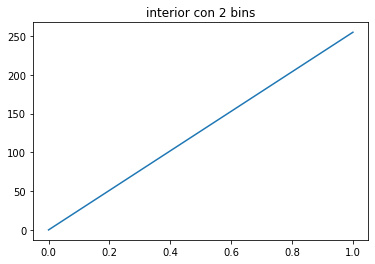

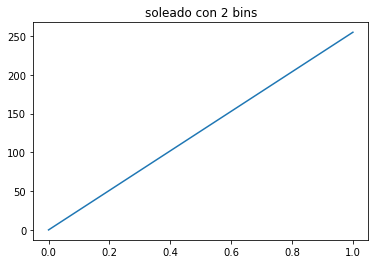

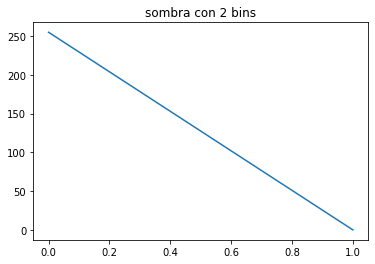

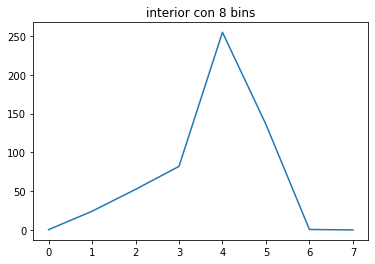

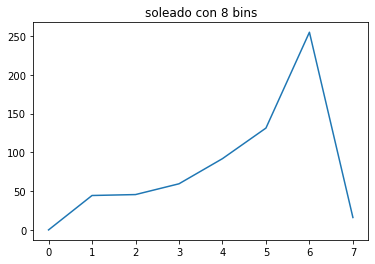

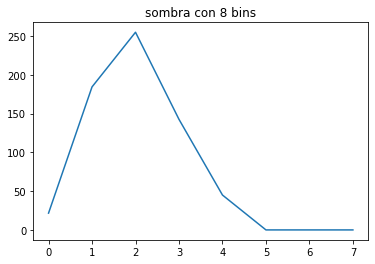

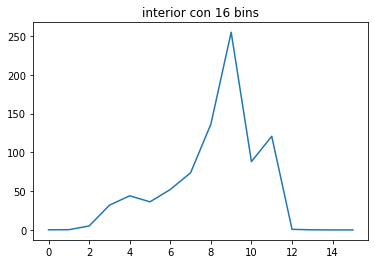

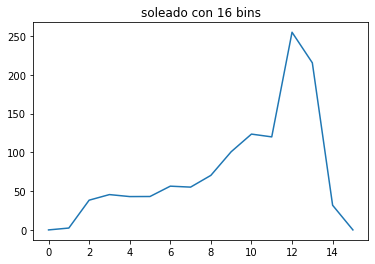

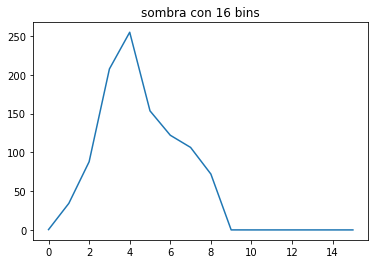

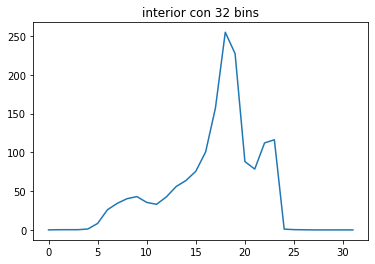

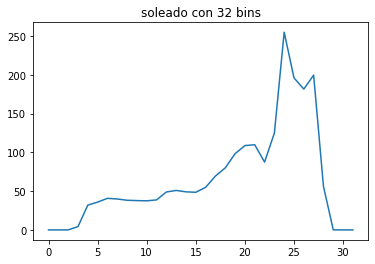

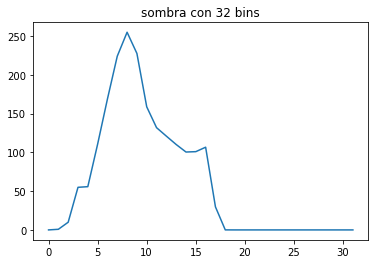

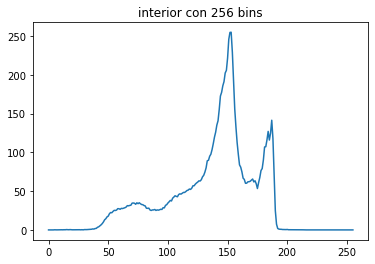

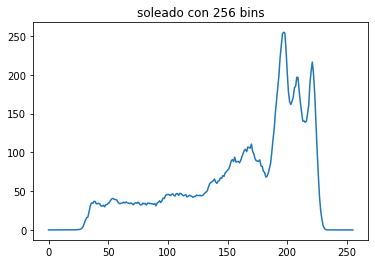

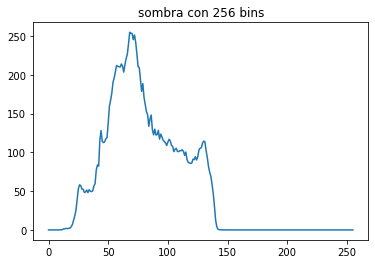

<Figure size 432x288 with 0 Axes>

In [57]:
bins = [2, 8, 16, 32, 256]
correlaciones = []
for i in bins:
        correlaciones.append(histogramas(i))

In [56]:
for j in range(len(correlaciones)):
    print("correlation12: " + str(correlaciones[j][0]))
    print("correlation13: " + str(correlaciones[j][1]))
    print("correlation23: " + str(correlaciones[j][2]))
    print("chisqrt12: " + str(correlaciones[j][3]))
    print("chisqrt13: " + str(correlaciones[j][4]))
    print("chisqrt23: " + str(correlaciones[j][5]))
    print("intersection12: " + str(correlaciones[j][6]))
    print("intersection13: " + str(correlaciones[j][7]))
    print("intersection23: " + str(correlaciones[j][8]))
    print("bhattacharyya12: " + str(correlaciones[j][9]))
    print("bhattacharyya13: " + str(correlaciones[j][10]))
    print("bhattacharyya23: " + str(correlaciones[j][11]))
    print("-"*100)

correlation12: 0.25197559357496313
correlation13: -0.1370888994550199
correlation23: -0.7695329527183534
chisqrt12: 30.983584502763136
chisqrt13: 1397.9059246063614
chisqrt23: 913.2823518953878
intersection12: 269.6137390136719
intersection13: 131.69467639923096
intersection23: 97.1399974822998
bhattacharyya12: 0.546681815380241
bhattacharyya13: 0.5229954108601212
bhattacharyya23: 0.7445865177475316
----------------------------------------------------------------------------------------------------
correlation12: 0.12451928267117418
correlation13: -0.07928501908388938
correlation23: -0.3235446503328301
chisqrt12: 1142432.9535031859
chisqrt13: 8079.1275376722915
chisqrt23: 3360.2899477360006
intersection12: 603.9262061932823
intersection13: 315.524259198457
intersection23: 354.5159886367619
bhattacharyya12: 0.4996621669697463
bhattacharyya13: 0.637387152331723
bhattacharyya23: 0.6916371515731737
--------------------------------------------------------------------------------------------

* Se puede observar que la correlación disminuye en proporción a la cantidad de bins, aproximadamente con un factor de 1/2
* La chi cuadrado presenta valores muy altos a pesar de que los histogramas estan normalizados. Se observa que crece en proporción a la cantidad de bins.
* La intersección tembien presenta valores altos y de igual forma crece de acuerdo a la cantidad de bins.
* La Bhattacharyya varia poco dependiendo de la cantidad de bins, es la relación que mayor constancia presenta